In [1]:
!pip install opencv-python ipywidgets matplotlib

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


FloatSlider(value=1.0, description='Red Balance', max=2.0)

FloatSlider(value=1.0, description='Green Balance', max=2.0)

FloatSlider(value=1.0, description='Blue Balance', max=2.0)

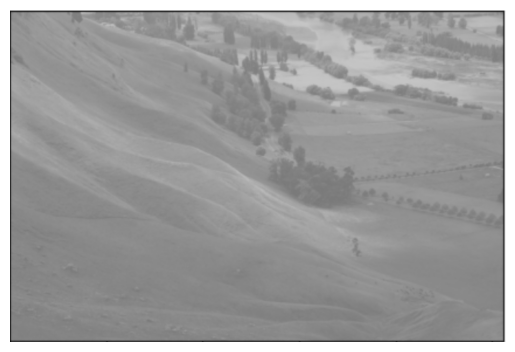

In [3]:
import cv2
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Function 1: color balance

# Load the image
img_path = '/content/Screenshot 2024-09-24 at 14.29.10.png'
img = cv2.imread(img_path)

# Check if the image was loaded successfully
if img is None:
    print(f"Error: Image not found at {img_path}")
else:
    # Convert BGR to RGB for displaying
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Function to apply color balance
    def apply_color_balance(img, r_balance, g_balance, b_balance):
        balanced_img = np.zeros_like(img)
        balanced_img[:, :, 0] = np.clip(img[:, :, 0] * r_balance, 0, 255)
        balanced_img[:, :, 1] = np.clip(img[:, :, 1] * g_balance, 0, 255)
        balanced_img[:, :, 2] = np.clip(img[:, :, 2] * b_balance, 0, 255)
        return balanced_img.astype(np.uint8)

    # Create sliders for color balance
    r_slider = widgets.FloatSlider(min=0, max=2, step=0.1, value=1, description='Red Balance')
    g_slider = widgets.FloatSlider(min=0, max=2, step=0.1, value=1, description='Green Balance')
    b_slider = widgets.FloatSlider(min=0, max=2, step=0.1, value=1, description='Blue Balance')

    # Function to update the displayed image when sliders are changed
    def update_color_balance(change):
        balanced_img = apply_color_balance(img, r_slider.value, g_slider.value, b_slider.value)
        clear_output(wait=True)  # Clear the previous output before displaying a new one
        display(r_slider, g_slider, b_slider)  # Re-display the sliders
        plt.imshow(balanced_img)
        plt.axis('off')  # Turn off axes for a cleaner look
        plt.show()

    # Attach the update function to each slider
    r_slider.observe(update_color_balance, 'value')
    g_slider.observe(update_color_balance, 'value')
    b_slider.observe(update_color_balance, 'value')

    # Display the sliders and initial image
    display(r_slider, g_slider, b_slider)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


Dropdown(description='Channel:', index=1, options=('YUV', 'Grayscale', 'R', 'G', 'B'), value='Grayscale')

FloatSlider(value=1.0, description='Intensity:', max=1.0)

Button(description='Apply Equalization', style=ButtonStyle())

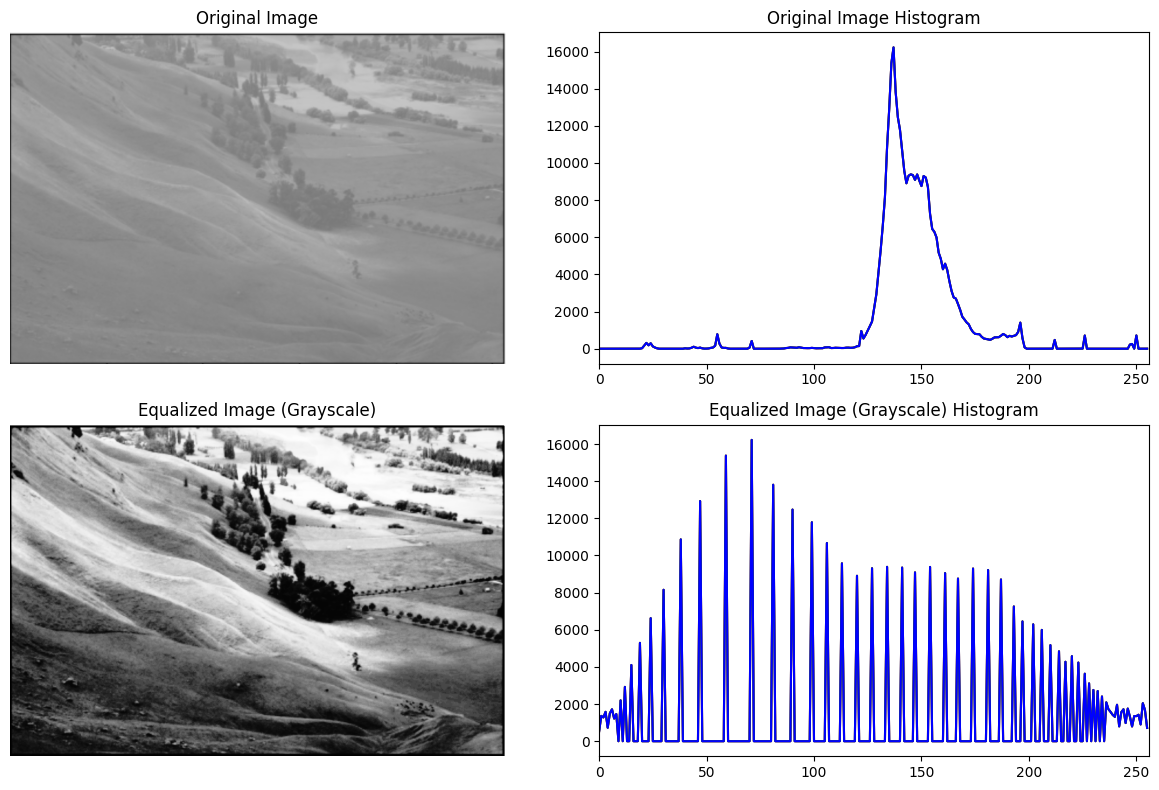

In [4]:
# Function 2: Show histogram and enter the necessary information to perform histogram equalization.

# Load the image
img_path = '/content/Screenshot 2024-09-24 at 14.29.10.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Function to perform histogram equalization
def equalize_histogram(img, channel='YUV', intensity=1.0):
    if channel == 'YUV':
        img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
        equalized_img = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    elif channel == 'Grayscale':
        img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        equalized_img = cv2.equalizeHist(img_gray)
        equalized_img = cv2.cvtColor(equalized_img, cv2.COLOR_GRAY2RGB)  # Convert to RGB for display
    else:
        # For individual RGB channels
        img_copy = img.copy()
        if channel == 'R':
            img_copy[:, :, 0] = cv2.equalizeHist(img_copy[:, :, 0])
        elif channel == 'G':
            img_copy[:, :, 1] = cv2.equalizeHist(img_copy[:, :, 1])
        elif channel == 'B':
            img_copy[:, :, 2] = cv2.equalizeHist(img_copy[:, :, 2])
        equalized_img = img_copy

    # Blend the original and equalized images based on intensity
    blended_img = cv2.addWeighted(img, 1 - intensity, equalized_img, intensity, 0)
    return blended_img

# Function to plot image and histogram
def plot_image_and_histogram(image, title, ax_img, ax_hist):
    # Display image
    ax_img.imshow(image)
    ax_img.set_title(title)
    ax_img.axis('off')

    # Display histogram
    colors = ('r', 'g', 'b')
    ax_hist.clear()  # Clear previous histograms
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        ax_hist.plot(hist, color=color)
        ax_hist.set_xlim([0, 256])

    ax_hist.set_title(f"{title} Histogram")

# UI to select options
channel_selector = widgets.Dropdown(
    options=['YUV', 'Grayscale', 'R', 'G', 'B'],
    value='YUV',
    description='Channel:'
)

# Slider for equalization intensity
intensity_slider = widgets.FloatSlider(
    value=1.0, min=0.0, max=1.0, step=0.1,
    description='Intensity:'
)

# Button to apply histogram equalization
apply_button = widgets.Button(description="Apply Equalization")

# Function to update the image and histograms based on the selected options
def update_equalization(change):
    # Clear only the output that displays the images and histograms
    clear_output(wait=True)

    # Display the widgets before showing output
    display(channel_selector, intensity_slider, apply_button)

    selected_channel = channel_selector.value
    intensity = intensity_slider.value
    equalized_img = equalize_histogram(img, channel=selected_channel, intensity=intensity)

    # Create subplots for original and equalized images and their histograms
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Plot original image and its histogram
    plot_image_and_histogram(img, 'Original Image', axs[0, 0], axs[0, 1])

    # Plot equalized image and its histogram
    plot_image_and_histogram(equalized_img, f'Equalized Image ({selected_channel})', axs[1, 0], axs[1, 1])

    # Adjust layout for better appearance
    plt.tight_layout()
    plt.show()

# Attach the function to the button and sliders
apply_button.on_click(update_equalization)
intensity_slider.observe(update_equalization, 'value')

# Display the dropdown, slider, and button (input widgets) before the output
display(channel_selector, intensity_slider, apply_button)

# Show initial output
update_equalization(None)

IntSlider(value=9, continuous_update=False, description='Kernel Size:', max=15, min=1, step=2)

Button(description='Apply Median Filter', style=ButtonStyle())

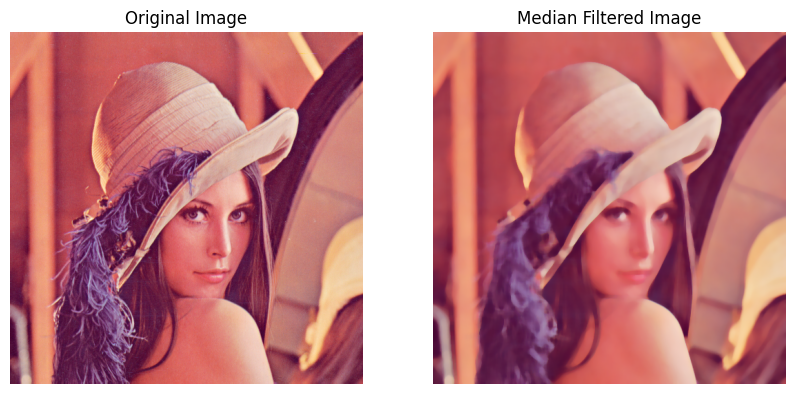

In [ ]:
# Function 3: implement the median filter

# Load the image
img_path = '/content/Lenna_(test_image).png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def apply_median_filter(img, kernel_size):
    if kernel_size % 2 == 0:
        kernel_size += 1  # Kernel size should be odd for median filter
    return cv2.medianBlur(img, kernel_size)

# Kernel size slider for median filter
kernel_size_slider = widgets.IntSlider(
    value=3, min=1, max=15, step=2, description='Kernel Size:', continuous_update=False
)

# Button to apply median filter
apply_button = widgets.Button(description="Apply Median Filter")

# Function to update the median filter output
def update_median_filter(change):
    clear_output(wait=True)

    # Display the input controls first
    display(kernel_size_slider, apply_button)

    kernel_size = kernel_size_slider.value
    filtered_img = apply_median_filter(img, kernel_size)

    # Display the original and filtered images
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(img)
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].imshow(filtered_img)
    axs[1].set_title('Median Filtered Image')
    axs[1].axis('off')

    plt.show()

# Attach the update function to the button
apply_button.on_click(update_median_filter)

# Display the slider and button
display(kernel_size_slider, apply_button)

# Show initial output
update_median_filter(None)

IntSlider(value=9, continuous_update=False, description='Kernel Size:', max=15, min=1, step=2)

Button(description='Apply Mean Filter', style=ButtonStyle())

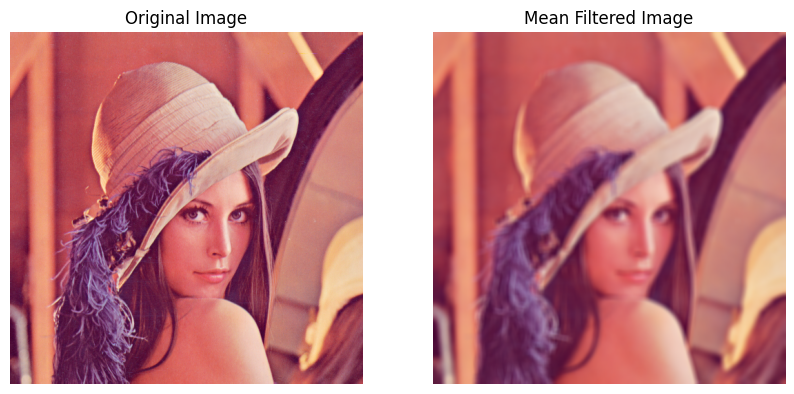

In [ ]:
# Load the image
img_path = '/content/Lenna_(test_image).png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Function 4: Apply mean filter
def apply_mean_filter(img, kernel_size):
    return cv2.blur(img, (kernel_size, kernel_size))

# Kernel size slider for mean filter
kernel_size_slider = widgets.IntSlider(
    value=3, min=1, max=15, step=2, description='Kernel Size:', continuous_update=False
)

# Button to apply mean filter
apply_button = widgets.Button(description="Apply Mean Filter")

# Function to update the mean filter output
def update_mean_filter(change):
    clear_output(wait=True)

    # Display the input controls first
    display(kernel_size_slider, apply_button)

    kernel_size = kernel_size_slider.value
    filtered_img = apply_mean_filter(img, kernel_size)

    # Display the original and filtered images
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(img)
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].imshow(filtered_img)
    axs[1].set_title('Mean Filtered Image')
    axs[1].axis('off')

    plt.show()

# Attach the update function to the button
apply_button.on_click(update_mean_filter)

# Display the slider and button
display(kernel_size_slider, apply_button)

# Show initial output
update_mean_filter(None)

IntSlider(value=15, continuous_update=False, description='Kernel Size:', max=15, min=1, step=2)

FloatSlider(value=5.0, continuous_update=False, description='Sigma:', max=5.0, min=0.1)

Button(description='Apply Gaussian Smoothing', style=ButtonStyle())

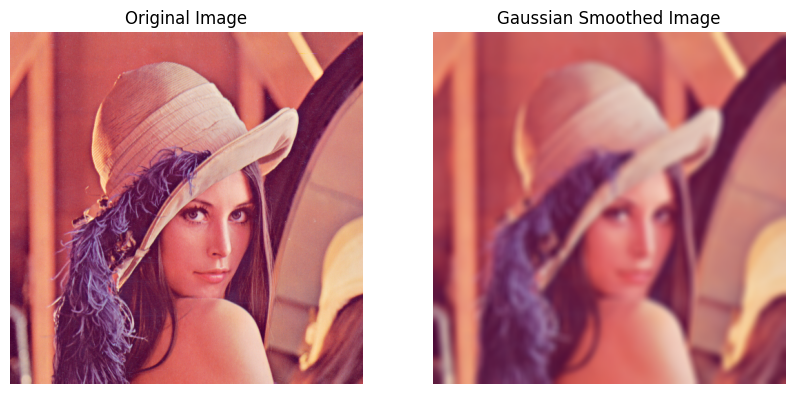

In [ ]:
# Load the image
img_path = '/content/Lenna_(test_image).png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Function 5: Apply Gaussian smoothing
def apply_gaussian_smoothing(img, kernel_size, sigma):
    if kernel_size % 2 == 0:
        kernel_size += 1  # Kernel size should be odd for Gaussian smoothing
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), sigma)

# Kernel size slider for Gaussian smoothing
kernel_size_slider = widgets.IntSlider(
    value=3, min=1, max=15, step=2, description='Kernel Size:', continuous_update=False
)

# Sigma slider for Gaussian smoothing
sigma_slider = widgets.FloatSlider(
    value=1.0, min=0.1, max=5.0, step=0.1, description='Sigma:', continuous_update=False
)

# Button to apply Gaussian smoothing
apply_button = widgets.Button(description="Apply Gaussian Smoothing")

# Function to update the Gaussian smoothing output
def update_gaussian_smoothing(change):
    clear_output(wait=True)

    # Display the input controls first
    display(kernel_size_slider, sigma_slider, apply_button)

    kernel_size = kernel_size_slider.value
    sigma = sigma_slider.value
    filtered_img = apply_gaussian_smoothing(img, kernel_size, sigma)

    # Display the original and filtered images
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(img)
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].imshow(filtered_img)
    axs[1].set_title('Gaussian Smoothed Image')
    axs[1].axis('off')

    plt.show()

# Attach the update function to the button
apply_button.on_click(update_gaussian_smoothing)

# Display the sliders and button
display(kernel_size_slider, sigma_slider, apply_button)

# Show initial output
update_gaussian_smoothing(None)